In [1]:
import numpy as np
from numpy import cos, sin, pi
from tqdm import tqdm as tqdm
from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt

In [175]:
n = 10
N = 200000
d = 3

## Génération de n vecteurs aléatoires de dimention d

In [176]:
vectors = np.random.normal(0, 1, (n, d))
vectors /= np.sqrt((vectors ** 2).sum(-1))[..., np.newaxis]

## Fonction d'apprentissage
### Arguments :
##### vectors : array numpy de taille (n, d) qui contient les vecteurs que l'ont veut faire bouger</br>
##### learning_rate : Coefficient multiplicateur qui permet de choisir l'amplitude du mouvement des vecteurs</br>

La fonction va parcourir les vecteurs dans l'ordre</br>
Pour chaque vecteur, elle va choisir le plus proche et faire en sorte que celui ci le repousse

In [178]:
def learn(vectors, learning_rate):
    new_vecteurs = []
    for i, v in enumerate(vectors):
        norms = []
        for j, u in enumerate(vectors):
            if i != j:
                # On fait le produit scalaire avec chaque vecteur. 
                # Plus celui ci est grand, plus les vecteurs sont proche l'un de l'autre.
                norms.append(min(1, (np.dot(v, u))))
            else:
                norms.append(-10)
        norm = np.max(norms)
        closest = np.where(norms == norm)[0][0]
        # La norm est la puissance avec laquelle le vecteur le plus proche va pousser l'autre
        # Vu que la distance entre les deux vecteur est cos(θ) on va faire pousser le vecteur de sin(θ)
        norm = 1 - norm**2
        # Le nouveau vecteur est généré en poussant l'ancien sur la droite créée par les deux vecteurs
        new_vec = v + learning_rate*norm*(v - vectors[closest])
        new_vecteurs.append(new_vec)
    new_vecteurs = np.array(new_vecteurs)
    new_vecteurs /= np.sqrt((new_vecteurs ** 2).sum(-1))[..., np.newaxis]
    return np.copy(new_vecteurs)

## Phase d'apprentissage :

In [179]:
for i in tqdm(range(N)):
    vectors = learn(vectors, (N - i)/(n*N))

100%|████████████████████████████████████████████████████████████████████████| 200000/200000 [02:17<00:00, 1449.71it/s]


## Visualisation des résultats (Seulement en 2d, 3d)

(-1.2, 1.2)

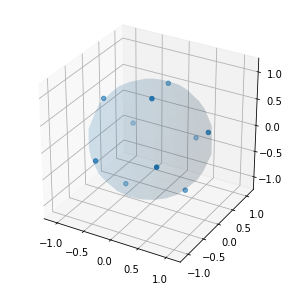

In [180]:
fig = plt.figure(figsize = (5, 5))
if d == 2:
    t = np.linspace(0, 2*pi, 1000)
    ax  = plt.axes()
    ax.scatter(vectors[:,0], vectors[:,1])
    ax.plot(cos(t), sin(t), linewidth=1)
elif d ==3:
    s, t = np.mgrid[0:2*np.pi:20j, 0:np.pi:10j]
    ax  = plt.axes(projection='3d')
    ax.scatter3D(vectors[:,0], vectors[:,1], vectors[:,2])
    ax.plot_surface(sin(t)*cos(s), sin(t)*sin(s), cos(t),  linewidth=1, alpha = 0.1)
    ax.set_zlim(-1.2,1.2)
    
ax.set_xlim(-1.2,1.2)
ax.set_ylim(-1.2,1.2)


## Obtention de la distance qui sépare les vecteurs de leurs plus proches voisins

In [183]:
distance = []
for i, v in enumerate(vectors):
    minid = []
    for j, u in enumerate(vectors):
        if j != i:
            minid.append(np.linalg.norm(u-v))
    distance.append(min(minid))

In [184]:
distance

[1.091424520046723,
 1.0914237200008323,
 1.0914312603655787,
 1.0914237200008323,
 1.0914241921311738,
 1.0914237291904616,
 1.0914236654665388,
 1.0914239982261302,
 1.091424646124507,
 1.0914236654665388]